In [1]:
#Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
!pip install textblob

#### Loading Twitter API Credentials
mykeys = open('twitterkeys.txt', 'r').read().splitlines()
consumerKey = mykeys[0]
consumerSecret = mykeys[1]
accessToken = mykeys[2]
accessTokenSecret = mykeys[3]

In [3]:
ACCESS_TOKEN = "3294900861-8vMK9Y2pUB7tWAUkzv3XM7yX9HKvY1kKvyE8gUC"
ACCESS_TOKEN_SECRET = "R8X52w4nNlbSBUlp0KSEQYVT6h0V8zse6AwAR947OME26"
CONSUMER_KEY = "fpwWvMuOVI0xHbacBwMaSCHqV" 
CONSUMER_SECRET = "OQoH53rEeXYZD62lcRpN85oSIVWjj8GIZ44HQkUYuX9oLLw3e5"

# OAuth process, using the keys and tokens
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
# Creation of the actual interface, using authentication
#api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [4]:
# Extract 100 tweets
posts = api.user_timeline(screen_name = "himabista", count = 1000, lang = "en", tweet_mode = "extended")

In [5]:
# Print the last 5 tweets from the account
print("Show the 5 recent tweets \n")
for tweet in posts[0:5]:
  print(tweet.full_text+'\n')

Show the 5 recent tweets 

@srinetrathapa May he find peace🤍 Rest In Power Bidhan Mama 🙏🏽 a young warrior who held on till the end🤍

@agyat13 आजको मुद्दा मात्र हैन यो!

@PBagchand So true 🙏🏽

कति प्याड तालिम भनेर मरिहत्ते गर्ने आज कता नि? नेपाल मै कलकारखना चाडै बनाउने कामको गफ खुब सुनेका छौ। बाबा आलमको पालाको रेलको गफ जस्तै। यो सब नहुन्जेल कर चाही लेको लै हो “बिलाशिता” को वस्तु प्याडमा? #रातोकरमाफगर

कर बढाएको हैन, नेपाल मै स्यानेटरी प्याड, टेम्पुन आदी बनाउने, अझ कपडाको लगाए हुन्छ भन्ने ज्ञान खुब प्राप्त भयो। कहिले बन्छ यसो भनम त? अनि त्यै टेम्पुन चाही लगाउने कति हुन्छन? अनि कपडा लगाउने तालिम बर्षै पिच्छे दिदा+



In [6]:
# Create a dataframe for posts
df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ['Tweets'])
df.head(5)


,Tweets
0,@srinetrathapa May he find peace🤍 Rest In Powe...
1,@agyat13 आजको मुद्दा मात्र हैन यो!
2,@PBagchand So true 🙏🏽
3,कति प्याड तालिम भनेर मरिहत्ते गर्ने आज कता नि?...
4,"कर बढाएको हैन, नेपाल मै स्यानेटरी प्याड, टेम्प..."


In [7]:
df.shape[0]

200

In [8]:
### Clean the text

# Create a function to class and tweets

def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9_:]+','',text) # Remove mentions
    text = re.sub(r'#','',text) #Removing the # symbol
    text = re.sub(r'RT[\s]+','',text) #Removing RT
    text = re.sub(r'https?:\/\/\S+','',text) #Removing hyperlink
    #text = re.sub(r'[0-9\)]','',text) #Removing numbers
    #text = re.sub(r'\S+','',text) #Removing hyperlink
    return text

# Cleaning the text

df['Tweets'] = df['Tweets'].apply(cleanTxt)  #or #df.Tweets = df.Tweets.apply(cleanTxt)

# Show the clean text
df.head(5)

,Tweets
0,May he find peace🤍 Rest In Power Bidhan Mama ...
1,आजको मुद्दा मात्र हैन यो!
2,So true 🙏🏽
3,कति प्याड तालिम भनेर मरिहत्ते गर्ने आज कता नि?...
4,"कर बढाएको हैन, नेपाल मै स्यानेटरी प्याड, टेम्प..."


In [9]:
# Creata a function to get the subjectivity(Tells how opinionated the text is)
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Creata a function to get the polarity(Tells how positive or negative the text is)
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [10]:
# Creating two new columns in the dataframe for subjectivity and Polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)
df.head(5)

,Tweets,Subjectivity,Polarity
0,May he find peace🤍 Rest In Power Bidhan Mama ...,0.40,0.10
1,आजको मुद्दा मात्र हैन यो!,0.00,0.00
2,So true 🙏🏽,0.65,0.35
3,कति प्याड तालिम भनेर मरिहत्ते गर्ने आज कता नि?...,0.00,0.00
4,"कर बढाएको हैन, नेपाल मै स्यानेटरी प्याड, टेम्प...",0.00,0.00


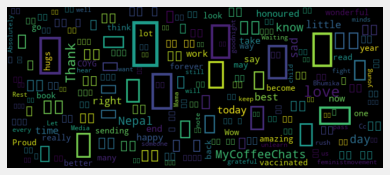

In [11]:
# Plot Word Cloud
allWords = ''.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 700, height = 300, random_state = 28, max_font_size=119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [12]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)
df.head(5)

,Tweets,Subjectivity,Polarity,Analysis
0,May he find peace🤍 Rest In Power Bidhan Mama ...,0.40,0.10,Positive
1,आजको मुद्दा मात्र हैन यो!,0.00,0.00,Neutral
2,So true 🙏🏽,0.65,0.35,Positive
3,कति प्याड तालिम भनेर मरिहत्ते गर्ने आज कता नि?...,0.00,0.00,Neutral
4,"कर बढाएको हैन, नेपाल मै स्यानेटरी प्याड, टेम्प...",0.00,0.00,Neutral


In [13]:
# Creating dataframe with just positive tweets
posDf = df[df['Analysis']=='Positive']
posTweets = posDf['Tweets']
posTweets.shape[0]

38

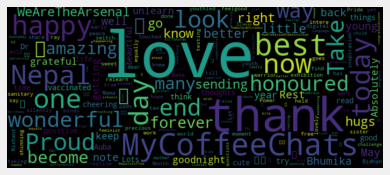

In [14]:
# Plot Word Cloud for positive tweets
allWords = ''.join([twts for twts in posDf['Tweets']])
wordCloud = WordCloud(width = 700, height = 300, random_state = 28, max_font_size=119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [15]:
# Creating dataframe with just negative tweets
negDf = df[df['Analysis']=='Negative']
negTweets = negDf['Tweets']
negTweets.shape[0]

15

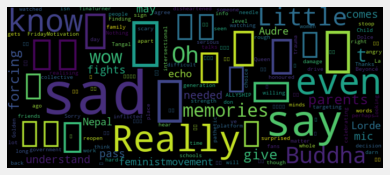

In [16]:
# Plot Word Cloud for negative tweets
allWords = ''.join([twts for twts in negDf['Tweets']])
wordCloud = WordCloud(width = 700, height = 300, random_state = 28, max_font_size=119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [17]:
# Creating dataframe with just neutral tweets
neuDf = df[df['Analysis']=='Neutral']
neuTweets = neuDf['Tweets']
neuTweets.shape[0]

147

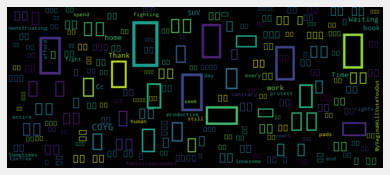

In [18]:
# Plot Word Cloud for neutral tweets
allWords = ''.join([twts for twts in neuDf['Tweets']])
wordCloud = WordCloud(width = 700, height = 300, random_state = 28, max_font_size=119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

Text(0.5, 1.0, 'Sentiment Analysis')

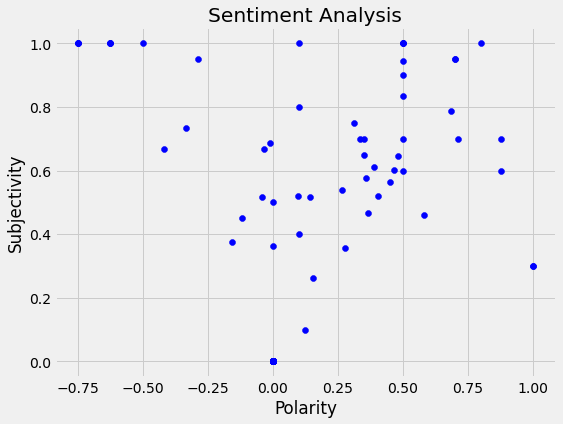

In [19]:
## Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
plt.scatter(df['Polarity'],df['Subjectivity'],color = 'Blue')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.title('Sentiment Analysis')
       

In [20]:
# Get the percentage of positive tweets
positiveTweetPercentage = round((posTweets.shape[0]/df.shape[0])*100,1)
posTweets.shape[0], positiveTweetPercentage

(38, 19.0)

In [21]:
# Get the percentage of negative tweets
negativeTweetPercentage = round((negTweets.shape[0]/df.shape[0])*100,1)
negTweets.shape[0],negativeTweetPercentage

(15, 7.5)

In [22]:
# Get the percentage of neutral tweets
neutralTweetPercentage = round((neuTweets.shape[0]/df.shape[0])*100,1)
neuTweets.shape[0], neutralTweetPercentage

(147, 73.5)

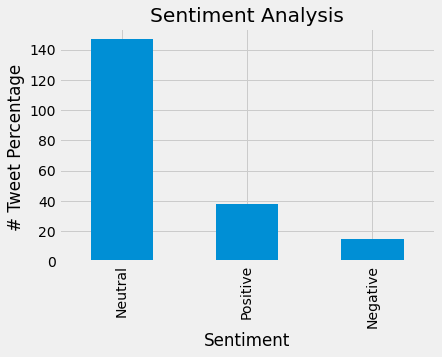

In [23]:
#Plot and visualize the positivity of the tweets
df['Analysis'].value_counts().plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('# Tweet Percentage ')
plt.title('Sentiment Analysis')
plt.show()

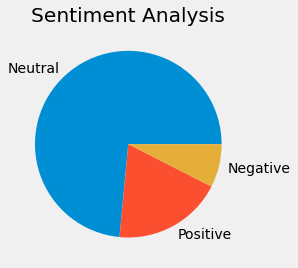

In [24]:
#Plot and visualize the positivity of the tweets
df['Analysis'].value_counts().plot(kind='pie')
plt.axis('off')
plt.title('Sentiment Analysis')
plt.show()